In [34]:

import cv2
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import time
img='/Users/ansojung/final-project-level3-cv-15/serving/images/common.jpg'
# ckpt_model='/Users/ansojung/final-project-level3-cv-15/serving/models/biseNet_best_mIoU2_epoch_268.pth'
# config_file='/Users/ansojung/final-project-level3-cv-15/serving/models/hyuns_bise.py'
config_file = '/Users/ansojung/final-project-level3-cv-15/serving/models/sm_icnet.py'
ckpt_model = '/Users/ansojung/final-project-level3-cv-15/serving/models/newset_best_mIoU_epoch_82.pth'

model = init_segmentor(config_file, ckpt_model, device='cpu')

# plt.figure(figsize=(15,15))
# canvas=cv2.imread(img)
# canvas=cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
# plt.imshow(canvas)

load checkpoint from local path: /Users/ansojung/final-project-level3-cv-15/serving/models/newset_best_mIoU_epoch_82.pth


/opt/homebrew/Caskroom/miniforge/base/envs/sojung/lib/python3.8/site-packages/torch/nn/functional.py:3657: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/sojung/lib/python3.8/site-packages/mmseg/models/segmentors/base.py:275: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


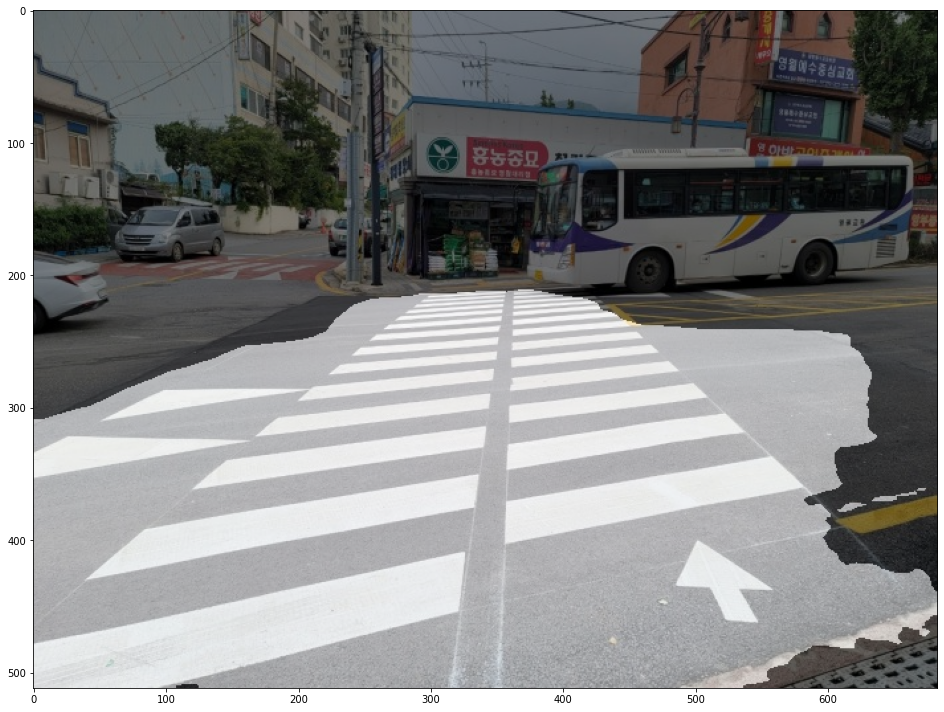

In [35]:
result = inference_segmentor(model, img)

PALETTE = [[0, 0, 0], [255, 255, 255]]


show_result_pyplot(model, img, result, palette=PALETTE)

19
21
4
480


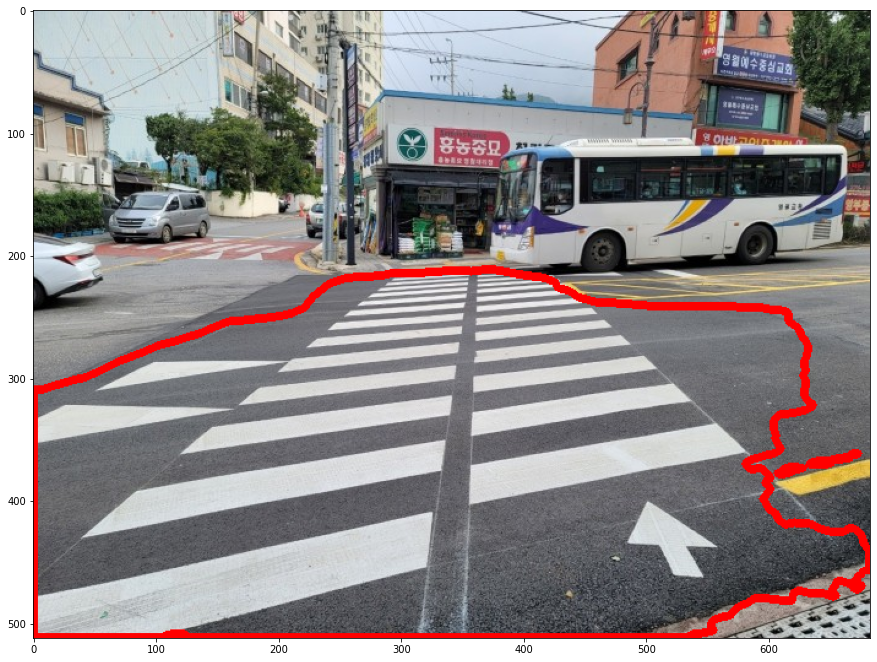

In [43]:

#masking 되어있는 모든 윤곽선을 가져외 찍기
import numpy as np
import matplotlib.pyplot as plt
result[0]=result[0].astype(np.uint8) #int8, int6 타입으로 변경해야 findContours을 사용가능

ret, img_binary = cv2.threshold(result[0], 0.9, 255, 0)
contours_approx_simple, _ = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#print(len(contours_approx_simple))
canvas=cv2.imread(img)
canvas=cv2.cvtColor(canvas, cv2.COLOR_RGB2BGR)
for cnt in contours_approx_simple:
    cv2.drawContours(canvas, [cnt], 0, (255, 0, 0), 5) 
    print(len(cnt))

plt.figure(figsize=(15,15))
plt.imshow(canvas)






6
approx 길이확인:  6
5
approx 길이확인:  5
4
approx 길이확인:  4
8
approx 길이확인:  8


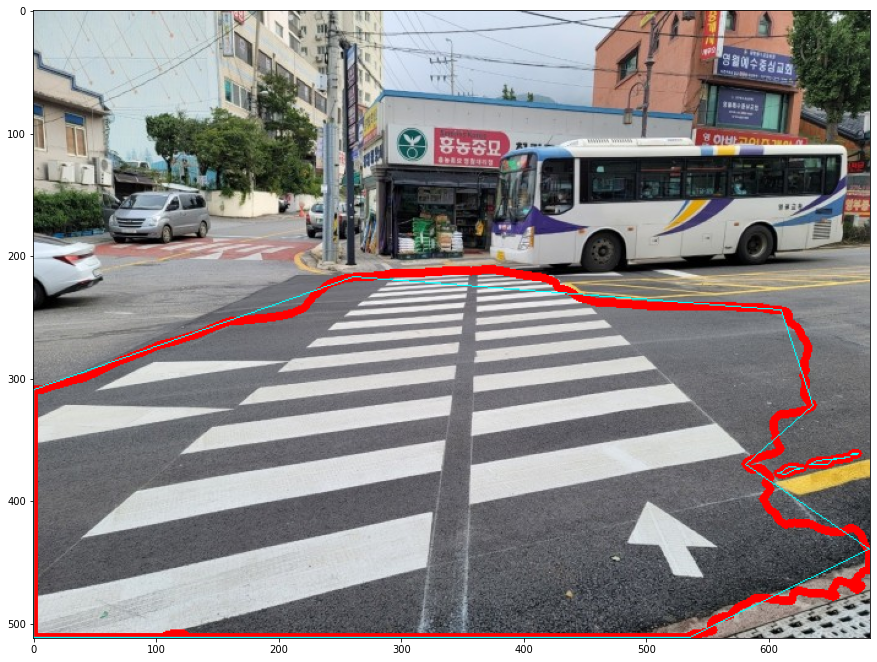

In [44]:

#윤곽선 좌표들을 -> polygon형태로 찍기(approx)

for cnt in contours_approx_simple:
    
    epsilon = 0.02 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    print( len(approx))

    cv2.drawContours(canvas,[approx],0,(0,255,255),1)
    print("approx 길이확인: ",len(approx))
    



plt.figure(figsize=(15,15))
plt.imshow(canvas)

    


In [33]:

print(img)
canvas=cv2.imread(img)

print(canvas.shape)

/Users/ansojung/final-project-level3-cv-15/serving/images/test_1.jpg
(4032, 3024, 3)
